In [ ]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
import seaborn as sn
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Performing data Analysis


In [ ]:
df.shape

(2035, 8)

In [ ]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


checking for null values in the data


In [ ]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
print(df.Date.max())
print(df.Open.max())
print(df.High.max())
print(df.Low.max())
print(df.Last.max())
print(df.Close.max())


2018-09-28
327.7
328.75
321.65
325.95
325.75


In [ ]:
print(df.Date.min())
print(df.Open.min())
print(df.High.min())
print(df.Low.min())
print(df.Last.min())
print(df.Close.min())

2010-07-21
81.1
82.8
80.0
81.0
80.95


Plotting the graphs


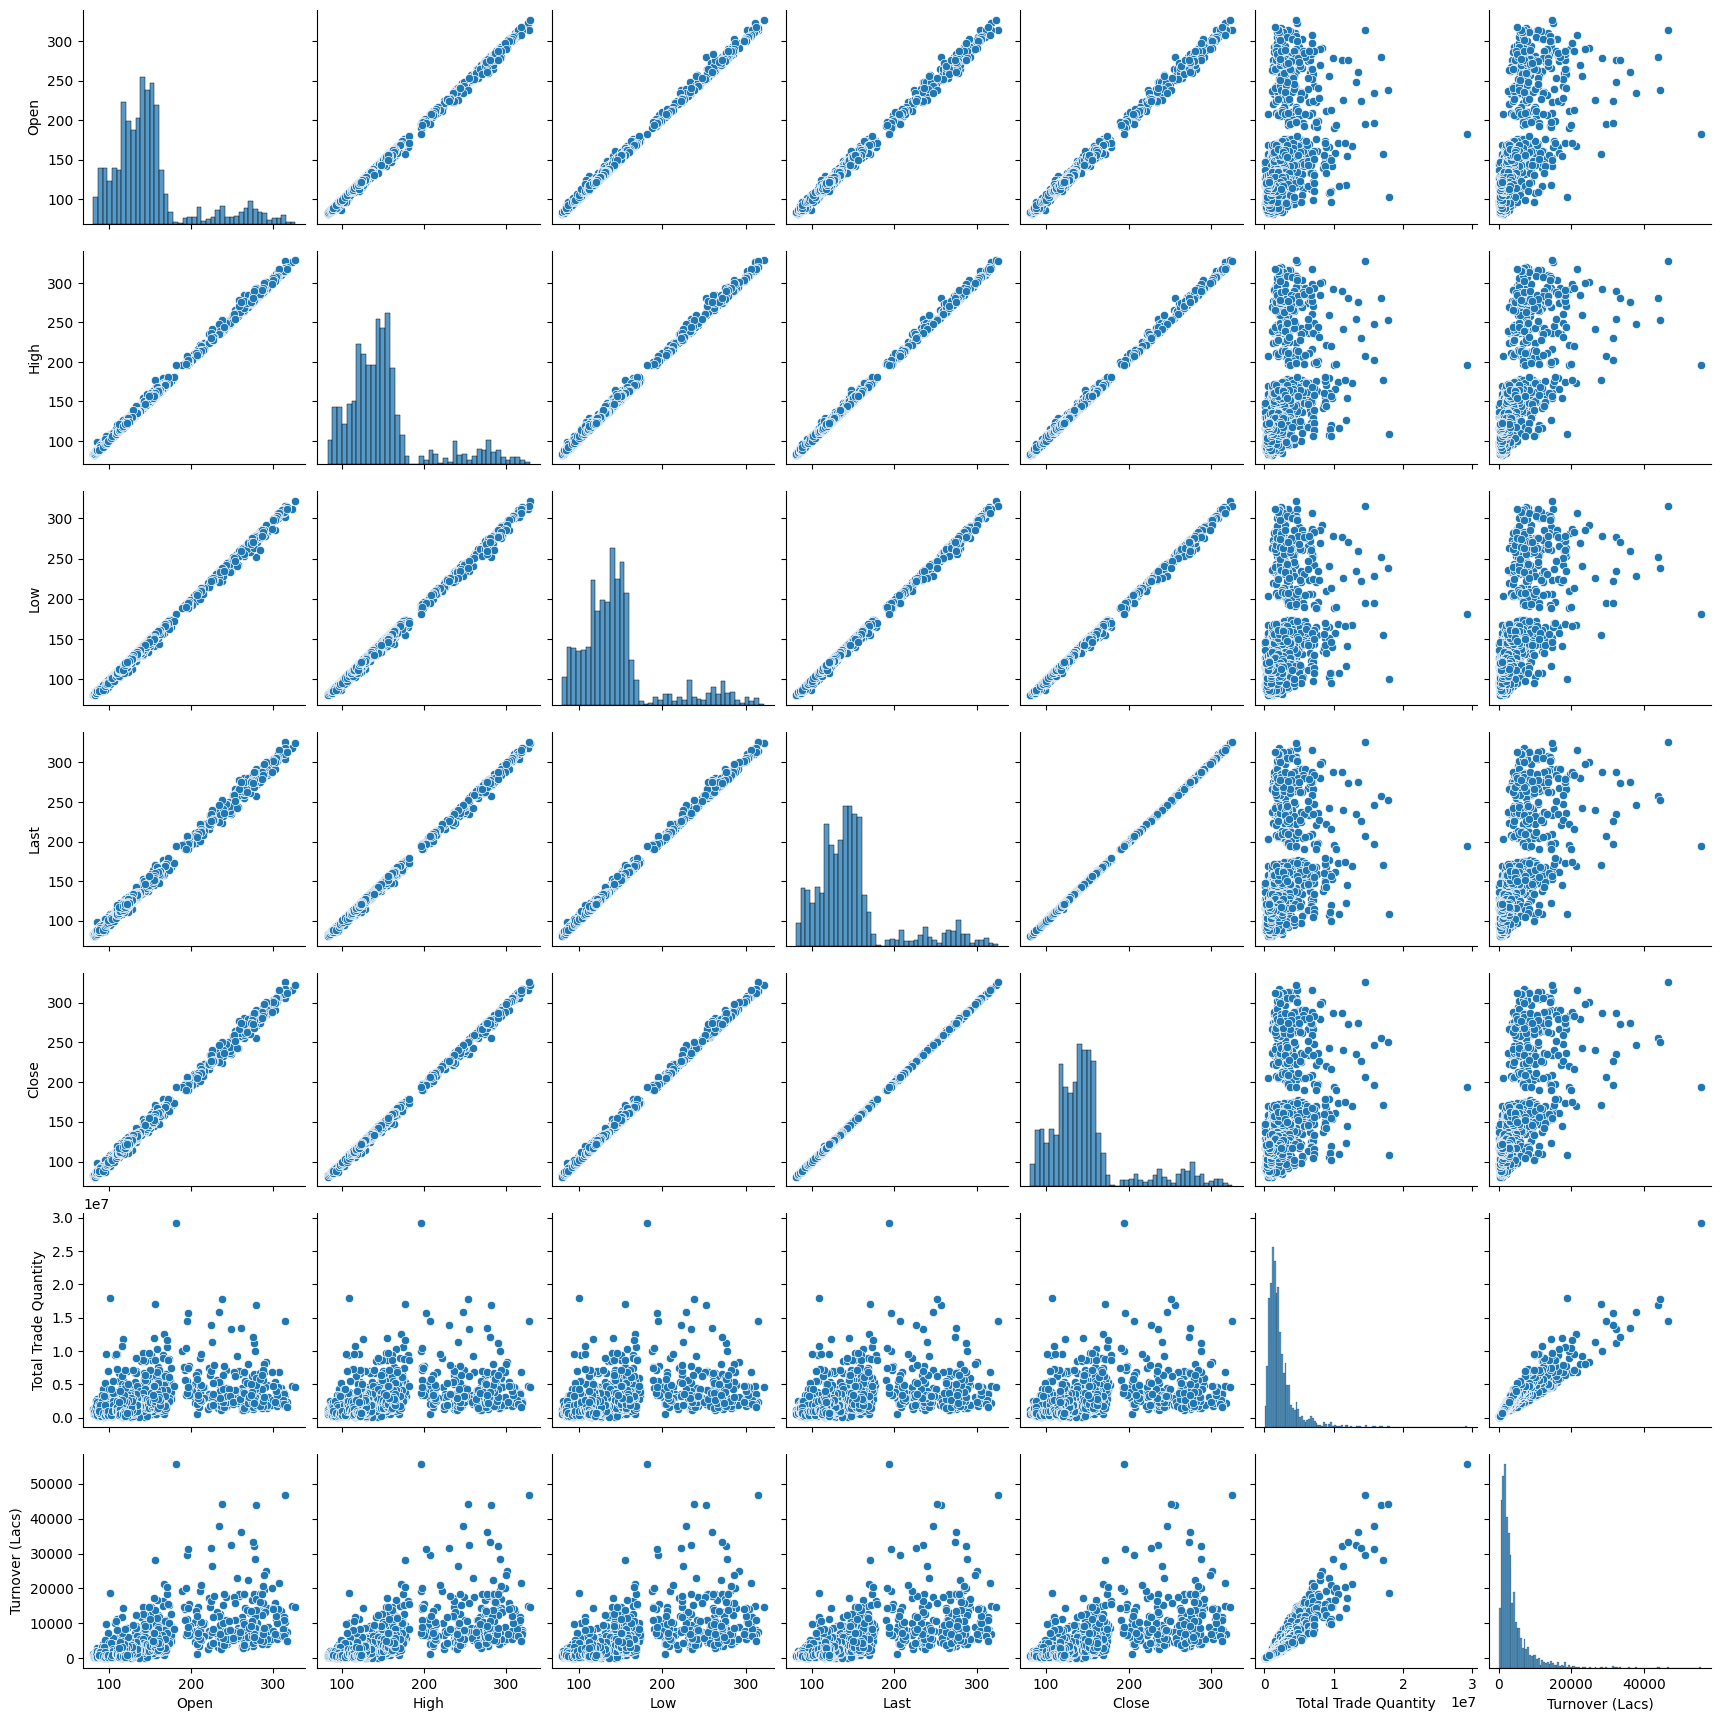

In [ ]:
sn.pairplot(df)
plt.show()

In [ ]:
#Resetting the index of dataframe
df2 = df.reset_index()['Open']

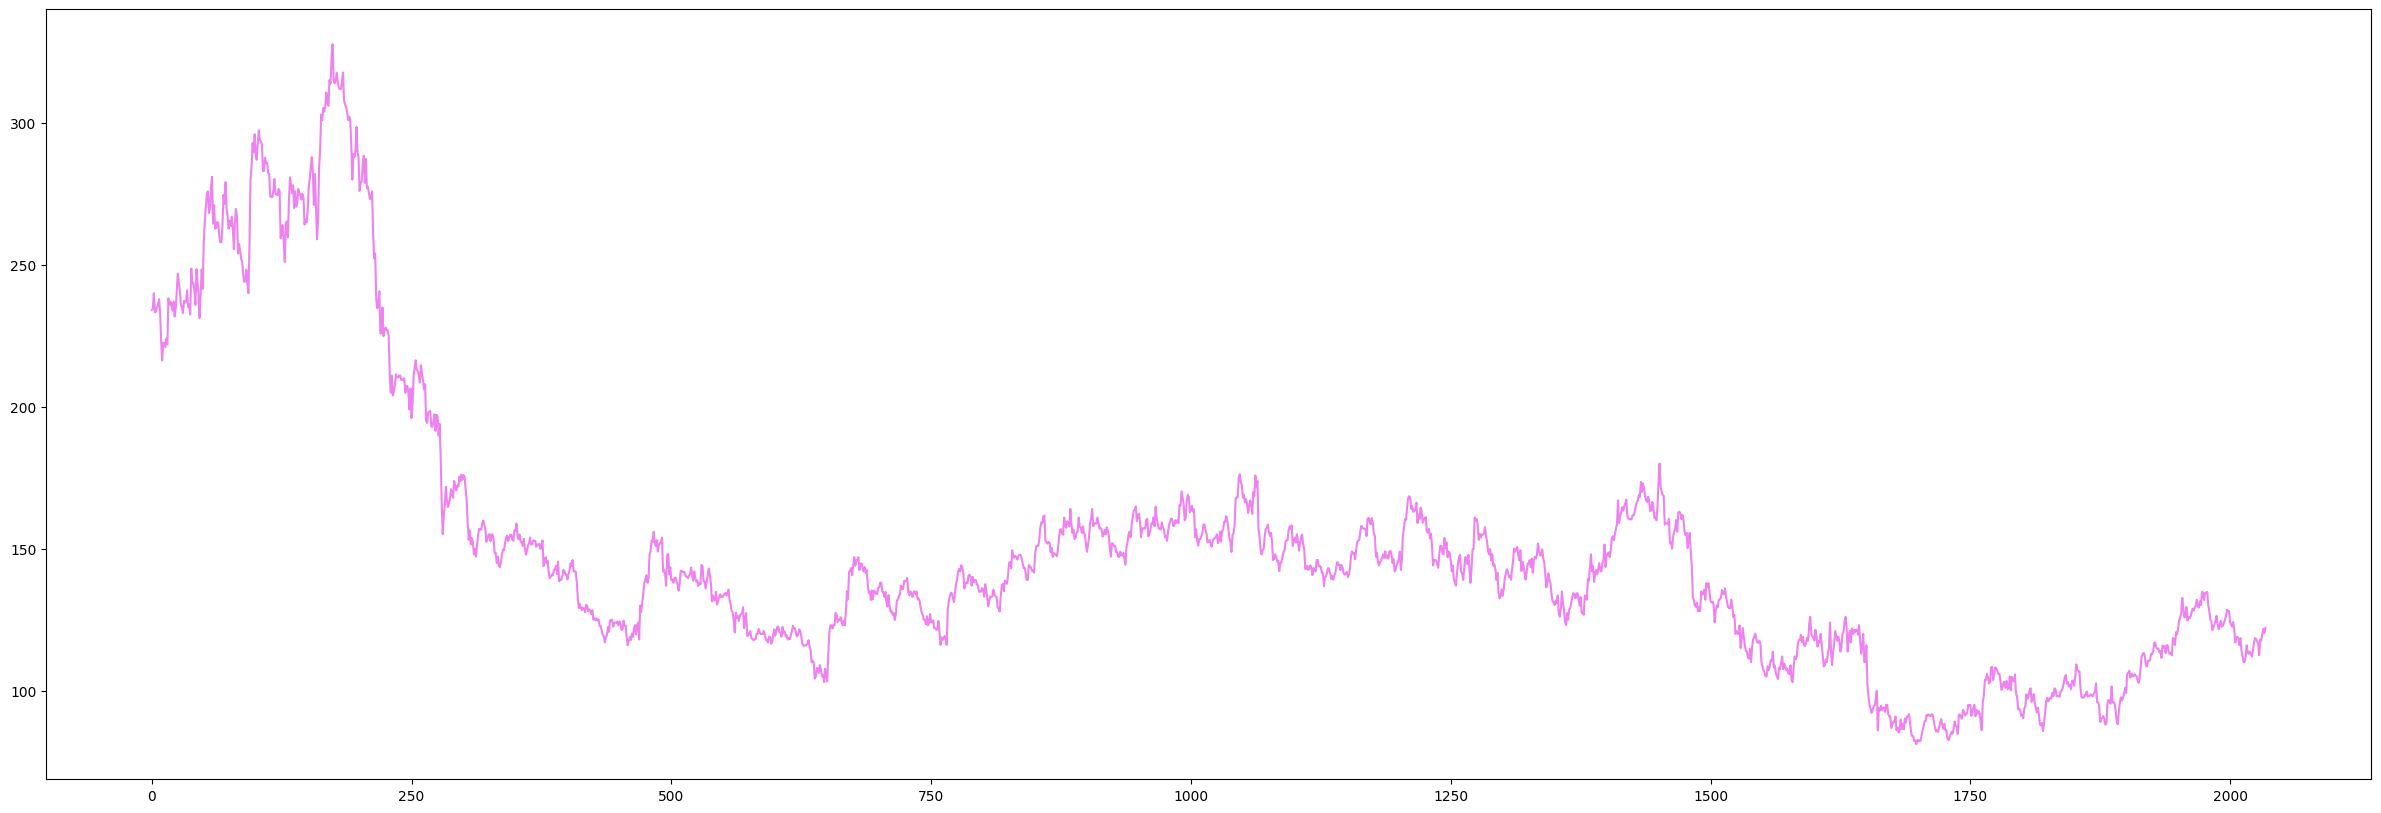

In [ ]:
plt.subplots(figsize=(30,10))
plt.plot(df2,color='violet')

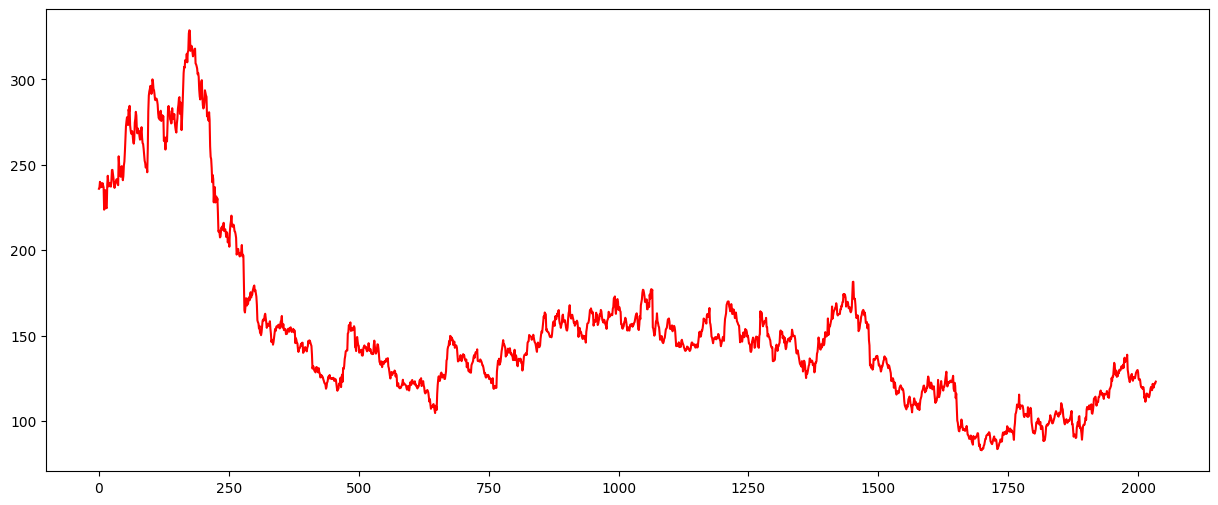

In [ ]:
plt.subplots(figsize=(15,6))
df2 = df.reset_index()['High']
plt.plot(df2,c='r')
plt.show()

Scaling the data

In [ ]:
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df.shape

(2035, 8)

In [ ]:
df2

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

Splitting the data into train and test sets

In [ ]:
train_data,test_data = train_test_split(df2,test_size=0.25)

In [ ]:
train_data.size

1526

In [ ]:
test_data.size

509

In [ ]:
train_data

array([[0.15836552],
       [0.28501728],
       [0.17544216],
       ...,
       [0.17483228],
       [0.21284814],
       [0.32364302]])

In [ ]:
test_data

array([[2.67127465e-01],
       [1.34580199e-01],
       [2.15084367e-01],
       [1.48404147e-02],
       [2.39072982e-01],
       [3.07582842e-01],
       [2.17320594e-01],
       [4.87904046e-02],
       [2.64281358e-02],
       [3.33401098e-01],
       [3.98454971e-02],
       [2.03090059e-01],
       [3.06566375e-01],
       [2.16100834e-01],
       [2.51677170e-01],
       [1.31734092e-01],
       [2.93149014e-01],
       [4.35047774e-02],
       [2.94978654e-01],
       [3.33401098e-01],
       [2.64281358e-01],
       [1.69546656e-01],
       [1.46574507e-01],
       [1.47997560e-01],
       [6.36511486e-01],
       [7.11526733e-02],
       [2.63061598e-01],
       [2.94775361e-01],
       [2.76478959e-01],
       [1.95364912e-01],
       [1.03679610e-01],
       [2.87456800e-01],
       [2.44358609e-01],
       [1.69546656e-01],
       [2.52083757e-01],
       [1.28684692e-01],
       [7.18032120e-01],
       [6.48505794e-02],
       [6.95263265e-02],
       [1.36613133e-01],


In [ ]:
def create_dataset(dataset,time_step=1):
  train_X,train_Y = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    train_X.append(a)
    train_Y.append(dataset[i+time_step,0])
  return np.array(train_X), np.array(train_Y)  

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
print(X_train.shape)

(1425, 100, 1)


In [ ]:
#training the model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
23/23 [==============================] - 18s 407ms/step - loss: 0.0548 - val_loss: 0.0425
Epoch 2/10
23/23 [==============================] - 11s 455ms/step - loss: 0.0408 - val_loss: 0.0425
Epoch 3/10
23/23 [==============================] - 11s 431ms/step - loss: 0.0402 - val_loss: 0.0420
Epoch 4/10
23/23 [==============================] - 10s 424ms/step - loss: 0.0403 - val_loss: 0.0421
Epoch 5/10
23/23 [==============================] - 9s 414ms/step - loss: 0.0400 - val_loss: 0.0427
Epoch 6/10
23/23 [==============================] - 9s 371ms/step - loss: 0.0405 - val_loss: 0.0429
Epoch 7/10
23/23 [==============================] - 10s 427ms/step - loss: 0.0400 - val_loss: 0.0425
Epoch 8/10
23/23 [==============================] - 10s 422ms/step - loss: 0.0419 - val_loss: 0.0427
Epoch 9/10
23/23 [==============================] - 9s 399ms/step - loss: 0.0399 - val_loss: 0.0427
Epoch 10/10
23/23 [==============================] - 9s 382ms/step - loss: 0.0402 - val_loss: 

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model performance
print(mean_squared_error(y_pred,y_test))

0.04181812115719292
